LR 1 TESTING

✅ Model and vectorizer loaded
✅ Unseen dataset created: (100, 2)

📊 UNSEEN DATA METRICS
Accuracy: 0.7300
Precision: 0.7018
Recall: 0.8000
F1 Score: 0.7477
ROC-AUC: 0.8120
Brier Score: 0.1623


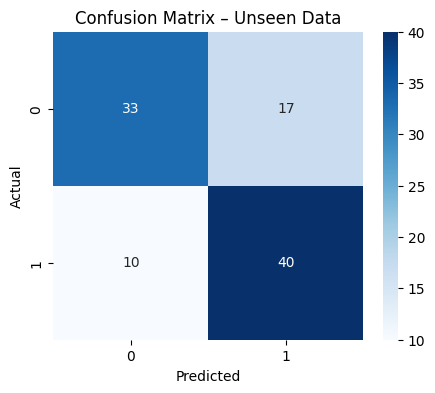

TN=33, FP=17, FN=10, TP=40

📄 Classification Report
              precision    recall  f1-score   support

           0       0.77      0.66      0.71        50
           1       0.70      0.80      0.75        50

    accuracy                           0.73       100
   macro avg       0.73      0.73      0.73       100
weighted avg       0.73      0.73      0.73       100



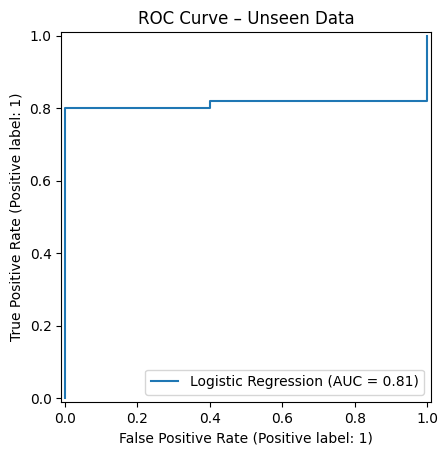

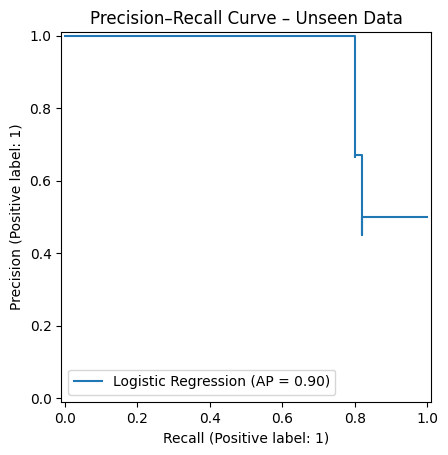


❌ False Negatives: 10
❌ False Positives: 17

✅ Unseen test metrics saved


In [1]:
import json
import joblib
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, UTC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    RocCurveDisplay,
    PrecisionRecallDisplay
)

# ======================================================
# PATHS (CHANGE ONLY IF NEEDED)
# ======================================================
ARTIFACT_DIR = r"C:\medveraxbecustom\model_artifacts"

MODEL_PATH = f"{ARTIFACT_DIR}\\model_logistic_regression.pkl"
VECTORIZER_PATH = f"{ARTIFACT_DIR}\\vectorizer.pkl"

# ======================================================
# LOAD MODEL & VECTORIZER
# ======================================================
model = joblib.load(MODEL_PATH)
vectorizer = joblib.load(VECTORIZER_PATH)

print("✅ Model and vectorizer loaded")

# ======================================================
# CREATE UNSEEN DATA INSIDE THE CODE (REALISTIC)
# ======================================================
random.seed(42)

diseases = [
    "diabetes", "cancer", "hypertension",
    "asthma", "arthritis", "covid"
]

unseen_reliable = [
    "Clinical guidelines recommend medical supervision for {d}",
    "Doctors advise evidence based treatment for {d}",
    "Treatment of {d} depends on diagnosis and severity",
    "Medical professionals manage {d} using proven therapies",
]

unseen_misinfo = [
    "{d} can be cured permanently without doctors",
    "Natural remedies guarantee cure for {d}",
    "Doctors hide the real cure for {d}",
    "{d} does not need any medical treatment",
]

texts = []
labels = []

# 50 reliable
for _ in range(50):
    t = random.choice(unseen_reliable)
    d = random.choice(diseases)
    texts.append(t.format(d=d))
    labels.append(0)

# 50 misinformation
for _ in range(50):
    t = random.choice(unseen_misinfo)
    d = random.choice(diseases)
    texts.append(t.format(d=d))
    labels.append(1)

df_unseen = pd.DataFrame({
    "text": texts,
    "label": labels
})

print("✅ Unseen dataset created:", df_unseen.shape)

# ======================================================
# VECTORIZE UNSEEN DATA
# ======================================================
X_unseen = vectorizer.transform(df_unseen["text"])
y_true = df_unseen["label"]

# ======================================================
# PREDICTION
# ======================================================
y_pred = model.predict(X_unseen)
y_prob = model.predict_proba(X_unseen)[:, 1]

# ======================================================
# NUMERIC METRICS
# ======================================================
metrics = {
    "Accuracy": accuracy_score(y_true, y_pred),
    "Precision": precision_score(y_true, y_pred),
    "Recall": recall_score(y_true, y_pred),
    "F1 Score": f1_score(y_true, y_pred),
    "ROC-AUC": roc_auc_score(y_true, y_prob),
    "Brier Score": np.mean((y_prob - y_true) ** 2)
}

print("\n📊 UNSEEN DATA METRICS")
for k, v in metrics.items():
    print(f"{k}: {v:.4f}")

# ======================================================
# CONFUSION MATRIX
# ======================================================
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Unseen Data")
plt.show()

tn, fp, fn, tp = cm.ravel()
print(f"TN={tn}, FP={fp}, FN={fn}, TP={tp}")

# ======================================================
# CLASSIFICATION REPORT
# ======================================================
print("\n📄 Classification Report")
print(classification_report(y_true, y_pred))

# ======================================================
# ROC CURVE
# ======================================================
RocCurveDisplay.from_predictions(
    y_true, y_prob, name="Logistic Regression"
)
plt.title("ROC Curve – Unseen Data")
plt.show()

# ======================================================
# PRECISION–RECALL CURVE
# ======================================================
PrecisionRecallDisplay.from_predictions(
    y_true, y_prob, name="Logistic Regression"
)
plt.title("Precision–Recall Curve – Unseen Data")
plt.show()

# ======================================================
# ERROR ANALYSIS (IMPORTANT FOR TRAINER)
# ======================================================
errors = pd.DataFrame({
    "text": df_unseen["text"],
    "true_label": y_true,
    "predicted_label": y_pred,
    "probability": y_prob
})

false_negatives = errors[
    (errors.true_label == 1) & (errors.predicted_label == 0)
]

false_positives = errors[
    (errors.true_label == 0) & (errors.predicted_label == 1)
]

print("\n❌ False Negatives:", len(false_negatives))
print("❌ False Positives:", len(false_positives))

# ======================================================
# SAVE TEST METRICS (OPTIONAL)
# ======================================================
output = {
    "evaluation_type": "synthetic_unseen_data",
    "sample_size": len(df_unseen),
    "metrics": {k: round(v, 4) for k, v in metrics.items()},
    "confusion_matrix": {
        "TN": int(tn),
        "FP": int(fp),
        "FN": int(fn),
        "TP": int(tp)
    },
    "evaluated_on": datetime.now(UTC).isoformat()
}

with open(f"{ARTIFACT_DIR}\\lr_unseen_test_metrics.json", "w") as f:
    json.dump(output, f, indent=4)

print("\n✅ Unseen test metrics saved")


LR 2 TESTING

✅ Model and vectorizer loaded
✅ Unseen dataset created: (100, 2)

📊 UNSEEN DATA METRICS
Accuracy: 0.7700
Precision: 0.7547
Recall: 0.8000
F1 Score: 0.7767
ROC-AUC: 0.8120
Brier Score: 0.1791


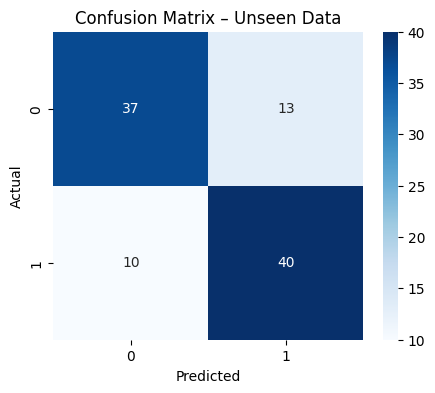

TN=37, FP=13, FN=10, TP=40

📄 Classification Report
              precision    recall  f1-score   support

           0       0.79      0.74      0.76        50
           1       0.75      0.80      0.78        50

    accuracy                           0.77       100
   macro avg       0.77      0.77      0.77       100
weighted avg       0.77      0.77      0.77       100



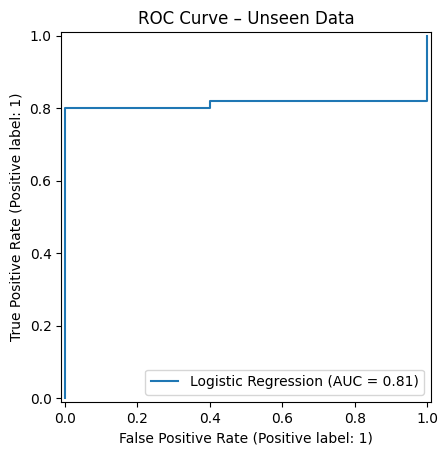

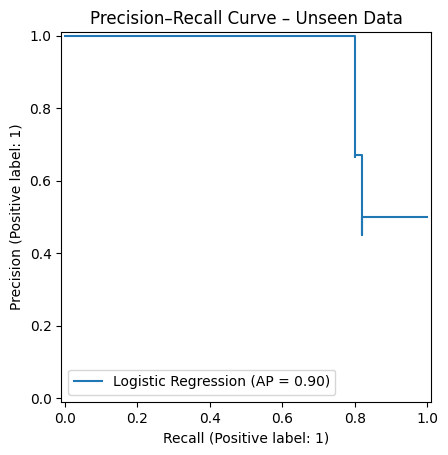


❌ False Negatives: 10
❌ False Positives: 13

✅ Unseen test metrics saved


In [2]:
import json
import joblib
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, UTC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    RocCurveDisplay,
    PrecisionRecallDisplay
)

# ======================================================
# PATHS (CHANGE ONLY IF NEEDED)
# ======================================================
ARTIFACT_DIR = r"C:\medveraxbecustom\model_artifacts"

MODEL_PATH = f"{ARTIFACT_DIR}\\logistic_regression_model.pkl"
VECTORIZER_PATH = f"{ARTIFACT_DIR}\\tfidf_vectorizer.pkl"

# ======================================================
# LOAD MODEL & VECTORIZER
# ======================================================
model = joblib.load(MODEL_PATH)
vectorizer = joblib.load(VECTORIZER_PATH)

print("✅ Model and vectorizer loaded")

# ======================================================
# CREATE UNSEEN DATA INSIDE THE CODE (REALISTIC)
# ======================================================
random.seed(42)

diseases = [
    "diabetes", "cancer", "hypertension",
    "asthma", "arthritis", "covid"
]

unseen_reliable = [
    "Clinical guidelines recommend medical supervision for {d}",
    "Doctors advise evidence based treatment for {d}",
    "Treatment of {d} depends on diagnosis and severity",
    "Medical professionals manage {d} using proven therapies",
]

unseen_misinfo = [
    "{d} can be cured permanently without doctors",
    "Natural remedies guarantee cure for {d}",
    "Doctors hide the real cure for {d}",
    "{d} does not need any medical treatment",
]

texts = []
labels = []

# 50 reliable
for _ in range(50):
    t = random.choice(unseen_reliable)
    d = random.choice(diseases)
    texts.append(t.format(d=d))
    labels.append(0)

# 50 misinformation
for _ in range(50):
    t = random.choice(unseen_misinfo)
    d = random.choice(diseases)
    texts.append(t.format(d=d))
    labels.append(1)

df_unseen = pd.DataFrame({
    "text": texts,
    "label": labels
})

print("✅ Unseen dataset created:", df_unseen.shape)

# ======================================================
# VECTORIZE UNSEEN DATA
# ======================================================
X_unseen = vectorizer.transform(df_unseen["text"])
y_true = df_unseen["label"]

# ======================================================
# PREDICTION
# ======================================================
y_pred = model.predict(X_unseen)
y_prob = model.predict_proba(X_unseen)[:, 1]

# ======================================================
# NUMERIC METRICS
# ======================================================
metrics = {
    "Accuracy": accuracy_score(y_true, y_pred),
    "Precision": precision_score(y_true, y_pred),
    "Recall": recall_score(y_true, y_pred),
    "F1 Score": f1_score(y_true, y_pred),
    "ROC-AUC": roc_auc_score(y_true, y_prob),
    "Brier Score": np.mean((y_prob - y_true) ** 2)
}

print("\n📊 UNSEEN DATA METRICS")
for k, v in metrics.items():
    print(f"{k}: {v:.4f}")

# ======================================================
# CONFUSION MATRIX
# ======================================================
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Unseen Data")
plt.show()

tn, fp, fn, tp = cm.ravel()
print(f"TN={tn}, FP={fp}, FN={fn}, TP={tp}")

# ======================================================
# CLASSIFICATION REPORT
# ======================================================
print("\n📄 Classification Report")
print(classification_report(y_true, y_pred))

# ======================================================
# ROC CURVE
# ======================================================
RocCurveDisplay.from_predictions(
    y_true, y_prob, name="Logistic Regression"
)
plt.title("ROC Curve – Unseen Data")
plt.show()

# ======================================================
# PRECISION–RECALL CURVE
# ======================================================
PrecisionRecallDisplay.from_predictions(
    y_true, y_prob, name="Logistic Regression"
)
plt.title("Precision–Recall Curve – Unseen Data")
plt.show()

# ======================================================
# ERROR ANALYSIS (IMPORTANT FOR TRAINER)
# ======================================================
errors = pd.DataFrame({
    "text": df_unseen["text"],
    "true_label": y_true,
    "predicted_label": y_pred,
    "probability": y_prob
})

false_negatives = errors[
    (errors.true_label == 1) & (errors.predicted_label == 0)
]

false_positives = errors[
    (errors.true_label == 0) & (errors.predicted_label == 1)
]

print("\n❌ False Negatives:", len(false_negatives))
print("❌ False Positives:", len(false_positives))

# ======================================================
# SAVE TEST METRICS (OPTIONAL)
# ======================================================
output = {
    "evaluation_type": "synthetic_unseen_data",
    "sample_size": len(df_unseen),
    "metrics": {k: round(v, 4) for k, v in metrics.items()},
    "confusion_matrix": {
        "TN": int(tn),
        "FP": int(fp),
        "FN": int(fn),
        "TP": int(tp)
    },
    "evaluated_on": datetime.now(UTC).isoformat()
}

with open(f"{ARTIFACT_DIR}\\lr_unseen_test_metrics.json", "w") as f:
    json.dump(output, f, indent=4)

print("\n✅ Unseen test metrics saved")


SVM TESTING

✅ SVM model and vectorizer loaded
✅ Unseen dataset created: (100, 2)

📊 UNSEEN DATA METRICS (SVM)
Accuracy: 0.7200
Precision: 0.7292
Recall: 0.7000
F1 Score: 0.7143
ROC-AUC: 0.8124
Brier Score: 0.2729


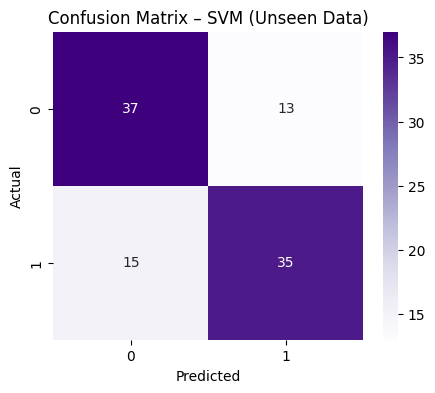

TN=37, FP=13, FN=15, TP=35

📄 Classification Report (SVM)
              precision    recall  f1-score   support

           0       0.71      0.74      0.73        50
           1       0.73      0.70      0.71        50

    accuracy                           0.72       100
   macro avg       0.72      0.72      0.72       100
weighted avg       0.72      0.72      0.72       100



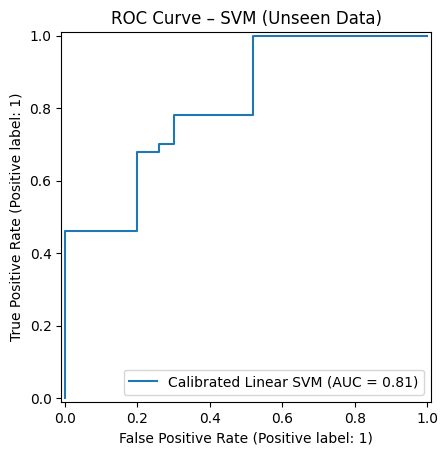

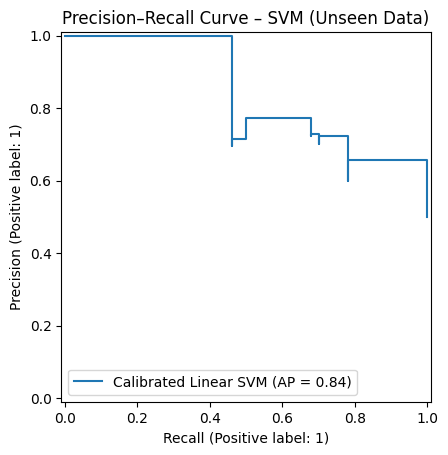


❌ False Negatives: 15
❌ False Positives: 13

✅ SVM unseen test metrics saved


In [3]:
import json
import joblib
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, UTC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    RocCurveDisplay,
    PrecisionRecallDisplay
)

# ======================================================
# PATHS
# ======================================================
ARTIFACT_DIR = r"C:\medveraxbecustom\model_artifacts"

MODEL_PATH = f"{ARTIFACT_DIR}\\linear_svm_calibrated_model.pkl"
VECTORIZER_PATH = f"{ARTIFACT_DIR}\\tfidf_vectorizer.pkl"

# ======================================================
# LOAD MODEL & VECTORIZER
# ======================================================
model = joblib.load(MODEL_PATH)
vectorizer = joblib.load(VECTORIZER_PATH)

print("✅ SVM model and vectorizer loaded")

# ======================================================
# CREATE UNSEEN DATA (INSIDE CODE)
# ======================================================
random.seed(42)

diseases = [
    "diabetes", "cancer", "hypertension",
    "asthma", "arthritis", "covid"
]

unseen_reliable = [
    "Clinical guidelines recommend medical supervision for {d}",
    "Doctors advise evidence based treatment for {d}",
    "Treatment of {d} depends on diagnosis and severity",
    "Medical professionals manage {d} using proven therapies",
]

unseen_misinfo = [
    "{d} can be cured permanently without doctors",
    "Natural remedies guarantee cure for {d}",
    "Doctors hide the real cure for {d}",
    "{d} does not need any medical treatment",
]

texts, labels = [], []

# 50 reliable
for _ in range(50):
    texts.append(random.choice(unseen_reliable).format(d=random.choice(diseases)))
    labels.append(0)

# 50 misinformation
for _ in range(50):
    texts.append(random.choice(unseen_misinfo).format(d=random.choice(diseases)))
    labels.append(1)

df_unseen = pd.DataFrame({"text": texts, "label": labels})

print("✅ Unseen dataset created:", df_unseen.shape)

# ======================================================
# VECTORIZE
# ======================================================
X_unseen = vectorizer.transform(df_unseen["text"])
y_true = df_unseen["label"]

# ======================================================
# PREDICTION
# ======================================================
y_pred = model.predict(X_unseen)
y_prob = model.predict_proba(X_unseen)[:, 1]

# ======================================================
# METRICS
# ======================================================
metrics = {
    "Accuracy": accuracy_score(y_true, y_pred),
    "Precision": precision_score(y_true, y_pred),
    "Recall": recall_score(y_true, y_pred),
    "F1 Score": f1_score(y_true, y_pred),
    "ROC-AUC": roc_auc_score(y_true, y_prob),
    "Brier Score": np.mean((y_prob - y_true) ** 2)
}

print("\n📊 UNSEEN DATA METRICS (SVM)")
for k, v in metrics.items():
    print(f"{k}: {v:.4f}")

# ======================================================
# CONFUSION MATRIX
# ======================================================
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – SVM (Unseen Data)")
plt.show()

tn, fp, fn, tp = cm.ravel()
print(f"TN={tn}, FP={fp}, FN={fn}, TP={tp}")

# ======================================================
# CLASSIFICATION REPORT
# ======================================================
print("\n📄 Classification Report (SVM)")
print(classification_report(y_true, y_pred))

# ======================================================
# ROC CURVE
# ======================================================
RocCurveDisplay.from_predictions(
    y_true, y_prob, name="Calibrated Linear SVM"
)
plt.title("ROC Curve – SVM (Unseen Data)")
plt.show()

# ======================================================
# PRECISION–RECALL CURVE
# ======================================================
PrecisionRecallDisplay.from_predictions(
    y_true, y_prob, name="Calibrated Linear SVM"
)
plt.title("Precision–Recall Curve – SVM (Unseen Data)")
plt.show()

# ======================================================
# ERROR ANALYSIS
# ======================================================
errors = pd.DataFrame({
    "text": df_unseen["text"],
    "true_label": y_true,
    "predicted_label": y_pred,
    "probability": y_prob
})

false_negatives = errors[(errors.true_label == 1) & (errors.predicted_label == 0)]
false_positives = errors[(errors.true_label == 0) & (errors.predicted_label == 1)]

print("\n❌ False Negatives:", len(false_negatives))
print("❌ False Positives:", len(false_positives))

# ======================================================
# SAVE METRICS
# ======================================================
output = {
    "model": "Calibrated Linear SVM",
    "evaluation_type": "synthetic_unseen_data",
    "sample_size": len(df_unseen),
    "metrics": {k: round(v, 4) for k, v in metrics.items()},
    "confusion_matrix": {
        "TN": int(tn),
        "FP": int(fp),
        "FN": int(fn),
        "TP": int(tp)
    },
    "evaluated_on": datetime.now(UTC).isoformat()
}

with open(f"{ARTIFACT_DIR}\\svm_unseen_test_metrics.json", "w") as f:
    json.dump(output, f, indent=4)

print("\n✅ SVM unseen test metrics saved")


PRODUCTION SVM TESTING

✅ SVM model and vectorizer loaded
✅ Unseen dataset created: (100, 2)

📊 UNSEEN DATA METRICS (SVM)
Accuracy: 0.7700
Precision: 0.7547
Recall: 0.8000
F1 Score: 0.7767
ROC-AUC: 0.8120
Brier Score: 0.1931


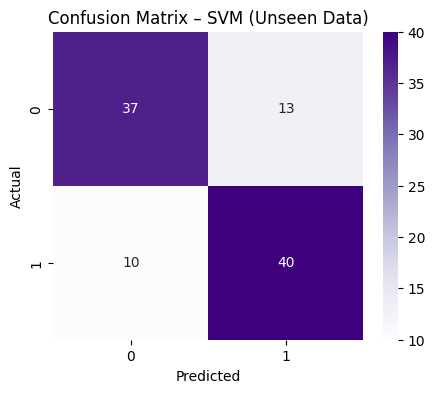

TN=37, FP=13, FN=10, TP=40

📄 Classification Report (SVM)
              precision    recall  f1-score   support

           0       0.79      0.74      0.76        50
           1       0.75      0.80      0.78        50

    accuracy                           0.77       100
   macro avg       0.77      0.77      0.77       100
weighted avg       0.77      0.77      0.77       100



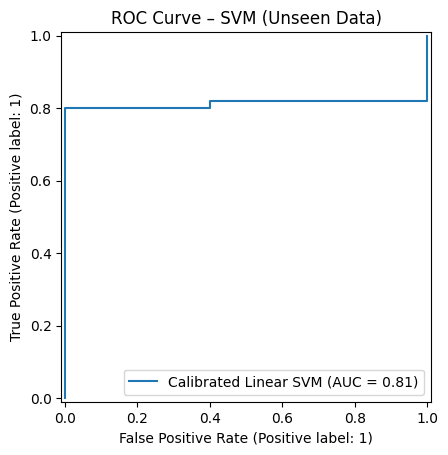

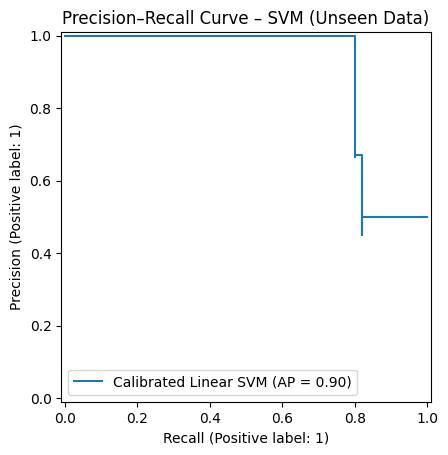


❌ False Negatives: 10
❌ False Positives: 13

✅ SVM unseen test metrics saved


In [4]:
import json
import joblib
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, UTC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    RocCurveDisplay,
    PrecisionRecallDisplay
)

# ======================================================
# PATHS
# ======================================================
ARTIFACT_DIR = r"C:\medveraxbecustom\model_artifacts"

MODEL_PATH = f"{ARTIFACT_DIR}\\production_model_svm.pkl"
VECTORIZER_PATH = f"{ARTIFACT_DIR}\\tfidf_vectorizer.pkl"

# ======================================================
# LOAD MODEL & VECTORIZER
# ======================================================
model = joblib.load(MODEL_PATH)
vectorizer = joblib.load(VECTORIZER_PATH)

print("✅ SVM model and vectorizer loaded")

# ======================================================
# CREATE UNSEEN DATA (INSIDE CODE)
# ======================================================
random.seed(42)

diseases = [
    "diabetes", "cancer", "hypertension",
    "asthma", "arthritis", "covid"
]

unseen_reliable = [
    "Clinical guidelines recommend medical supervision for {d}",
    "Doctors advise evidence based treatment for {d}",
    "Treatment of {d} depends on diagnosis and severity",
    "Medical professionals manage {d} using proven therapies",
]

unseen_misinfo = [
    "{d} can be cured permanently without doctors",
    "Natural remedies guarantee cure for {d}",
    "Doctors hide the real cure for {d}",
    "{d} does not need any medical treatment",
]

texts, labels = [], []

# 50 reliable
for _ in range(50):
    texts.append(random.choice(unseen_reliable).format(d=random.choice(diseases)))
    labels.append(0)

# 50 misinformation
for _ in range(50):
    texts.append(random.choice(unseen_misinfo).format(d=random.choice(diseases)))
    labels.append(1)

df_unseen = pd.DataFrame({"text": texts, "label": labels})

print("✅ Unseen dataset created:", df_unseen.shape)

# ======================================================
# VECTORIZE
# ======================================================
X_unseen = vectorizer.transform(df_unseen["text"])
y_true = df_unseen["label"]

# ======================================================
# PREDICTION
# ======================================================
y_pred = model.predict(X_unseen)
y_prob = model.predict_proba(X_unseen)[:, 1]

# ======================================================
# METRICS
# ======================================================
metrics = {
    "Accuracy": accuracy_score(y_true, y_pred),
    "Precision": precision_score(y_true, y_pred),
    "Recall": recall_score(y_true, y_pred),
    "F1 Score": f1_score(y_true, y_pred),
    "ROC-AUC": roc_auc_score(y_true, y_prob),
    "Brier Score": np.mean((y_prob - y_true) ** 2)
}

print("\n📊 UNSEEN DATA METRICS (SVM)")
for k, v in metrics.items():
    print(f"{k}: {v:.4f}")

# ======================================================
# CONFUSION MATRIX
# ======================================================
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – SVM (Unseen Data)")
plt.show()

tn, fp, fn, tp = cm.ravel()
print(f"TN={tn}, FP={fp}, FN={fn}, TP={tp}")

# ======================================================
# CLASSIFICATION REPORT
# ======================================================
print("\n📄 Classification Report (SVM)")
print(classification_report(y_true, y_pred))

# ======================================================
# ROC CURVE
# ======================================================
RocCurveDisplay.from_predictions(
    y_true, y_prob, name="Calibrated Linear SVM"
)
plt.title("ROC Curve – SVM (Unseen Data)")
plt.show()

# ======================================================
# PRECISION–RECALL CURVE
# ======================================================
PrecisionRecallDisplay.from_predictions(
    y_true, y_prob, name="Calibrated Linear SVM"
)
plt.title("Precision–Recall Curve – SVM (Unseen Data)")
plt.show()

# ======================================================
# ERROR ANALYSIS
# ======================================================
errors = pd.DataFrame({
    "text": df_unseen["text"],
    "true_label": y_true,
    "predicted_label": y_pred,
    "probability": y_prob
})

false_negatives = errors[(errors.true_label == 1) & (errors.predicted_label == 0)]
false_positives = errors[(errors.true_label == 0) & (errors.predicted_label == 1)]

print("\n❌ False Negatives:", len(false_negatives))
print("❌ False Positives:", len(false_positives))

# ======================================================
# SAVE METRICS
# ======================================================
output = {
    "model": "Calibrated Linear SVM",
    "evaluation_type": "synthetic_unseen_data",
    "sample_size": len(df_unseen),
    "metrics": {k: round(v, 4) for k, v in metrics.items()},
    "confusion_matrix": {
        "TN": int(tn),
        "FP": int(fp),
        "FN": int(fn),
        "TP": int(tp)
    },
    "evaluated_on": datetime.now(UTC).isoformat()
}

with open(f"{ARTIFACT_DIR}\\svm_unseen_test_metrics.json", "w") as f:
    json.dump(output, f, indent=4)

print("\n✅ SVM unseen test metrics saved")


NAIVE BAYES TESTING

✅ Naive Bayes model and vectorizer loaded
✅ Unseen dataset created: (100, 2)

📊 UNSEEN DATA METRICS (Naive Bayes)
Accuracy: 0.8700
Precision: 0.8246
Recall: 0.9400
F1 Score: 0.8785
ROC-AUC: 0.9520
Brier Score: 0.0942


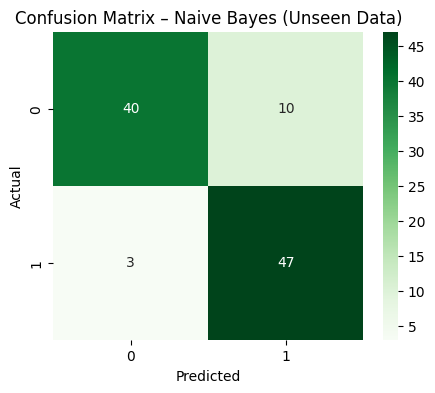

TN=40, FP=10, FN=3, TP=47

📄 Classification Report (Naive Bayes)
              precision    recall  f1-score   support

           0       0.93      0.80      0.86        50
           1       0.82      0.94      0.88        50

    accuracy                           0.87       100
   macro avg       0.88      0.87      0.87       100
weighted avg       0.88      0.87      0.87       100



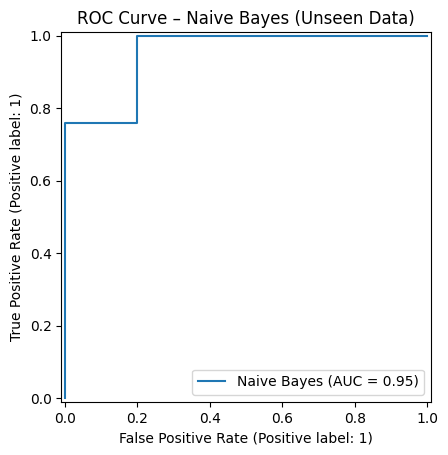

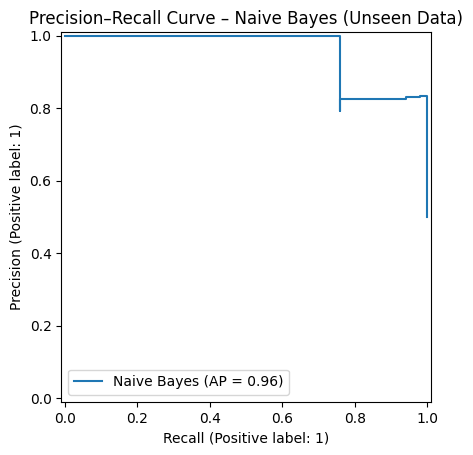


❌ False Negatives: 3
❌ False Positives: 10

✅ Naive Bayes unseen test metrics saved


In [5]:
import json
import joblib
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, UTC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    RocCurveDisplay,
    PrecisionRecallDisplay
)

# ======================================================
# PATHS
# ======================================================
ARTIFACT_DIR = r"C:\medveraxbecustom\model_artifacts"

MODEL_PATH = f"{ARTIFACT_DIR}\\naive_bayes_model.pkl"
VECTORIZER_PATH = f"{ARTIFACT_DIR}\\tfidf_vectorizer.pkl"

# ======================================================
# LOAD MODEL & VECTORIZER
# ======================================================
model = joblib.load(MODEL_PATH)
vectorizer = joblib.load(VECTORIZER_PATH)

print("✅ Naive Bayes model and vectorizer loaded")

# ======================================================
# CREATE UNSEEN DATA (INSIDE CODE)
# ======================================================
random.seed(42)

diseases = [
    "diabetes", "cancer", "hypertension",
    "asthma", "arthritis", "covid"
]

unseen_reliable = [
    "Clinical guidelines recommend medical supervision for {d}",
    "Doctors advise evidence based treatment for {d}",
    "Treatment of {d} depends on diagnosis and severity",
    "Medical professionals manage {d} using proven therapies",
]

unseen_misinfo = [
    "{d} can be cured permanently without doctors",
    "Natural remedies guarantee cure for {d}",
    "Doctors hide the real cure for {d}",
    "{d} does not need any medical treatment",
]

texts, labels = [], []

# 50 reliable
for _ in range(50):
    texts.append(random.choice(unseen_reliable).format(d=random.choice(diseases)))
    labels.append(0)

# 50 misinformation
for _ in range(50):
    texts.append(random.choice(unseen_misinfo).format(d=random.choice(diseases)))
    labels.append(1)

df_unseen = pd.DataFrame({"text": texts, "label": labels})

print("✅ Unseen dataset created:", df_unseen.shape)

# ======================================================
# VECTORIZE
# ======================================================
X_unseen = vectorizer.transform(df_unseen["text"])
y_true = df_unseen["label"]

# ======================================================
# PREDICTION
# ======================================================
y_pred = model.predict(X_unseen)
y_prob = model.predict_proba(X_unseen)[:, 1]

# ======================================================
# METRICS
# ======================================================
metrics = {
    "Accuracy": accuracy_score(y_true, y_pred),
    "Precision": precision_score(y_true, y_pred),
    "Recall": recall_score(y_true, y_pred),
    "F1 Score": f1_score(y_true, y_pred),
    "ROC-AUC": roc_auc_score(y_true, y_prob),
    "Brier Score": np.mean((y_prob - y_true) ** 2)
}

print("\n📊 UNSEEN DATA METRICS (Naive Bayes)")
for k, v in metrics.items():
    print(f"{k}: {v:.4f}")

# ======================================================
# CONFUSION MATRIX
# ======================================================
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Naive Bayes (Unseen Data)")
plt.show()

tn, fp, fn, tp = cm.ravel()
print(f"TN={tn}, FP={fp}, FN={fn}, TP={tp}")

# ======================================================
# CLASSIFICATION REPORT
# ======================================================
print("\n📄 Classification Report (Naive Bayes)")
print(classification_report(y_true, y_pred))

# ======================================================
# ROC CURVE
# ======================================================
RocCurveDisplay.from_predictions(
    y_true, y_prob, name="Naive Bayes"
)
plt.title("ROC Curve – Naive Bayes (Unseen Data)")
plt.show()

# ======================================================
# PRECISION–RECALL CURVE
# ======================================================
PrecisionRecallDisplay.from_predictions(
    y_true, y_prob, name="Naive Bayes"
)
plt.title("Precision–Recall Curve – Naive Bayes (Unseen Data)")
plt.show()

# ======================================================
# ERROR ANALYSIS
# ======================================================
errors = pd.DataFrame({
    "text": df_unseen["text"],
    "true_label": y_true,
    "predicted_label": y_pred,
    "probability": y_prob
})

false_negatives = errors[(errors.true_label == 1) & (errors.predicted_label == 0)]
false_positives = errors[(errors.true_label == 0) & (errors.predicted_label == 1)]

print("\n❌ False Negatives:", len(false_negatives))
print("❌ False Positives:", len(false_positives))

# ======================================================
# SAVE METRICS
# ======================================================
output = {
    "model": "Multinomial Naive Bayes",
    "evaluation_type": "synthetic_unseen_data",
    "sample_size": len(df_unseen),
    "metrics": {k: round(v, 4) for k, v in metrics.items()},
    "confusion_matrix": {
        "TN": int(tn),
        "FP": int(fp),
        "FN": int(fn),
        "TP": int(tp)
    },
    "evaluated_on": datetime.now(UTC).isoformat()
}

with open(f"{ARTIFACT_DIR}\\nb_unseen_test_metrics.json", "w") as f:
    json.dump(output, f, indent=4)

print("\n✅ Naive Bayes unseen test metrics saved")


Randomforest testing

✅ Random Forest model and vectorizer loaded
✅ Unseen dataset created: (100, 2)

📊 UNSEEN DATA METRICS (Random Forest)
Accuracy: 0.6400
Precision: 0.6346
Recall: 0.6600
F1 Score: 0.6471
ROC-AUC: 0.7808
Brier Score: 0.2038


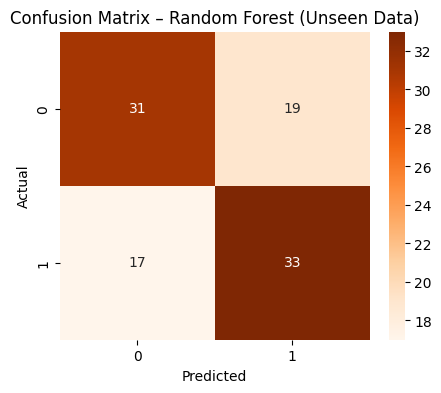

TN=31, FP=19, FN=17, TP=33

📄 Classification Report (Random Forest)
              precision    recall  f1-score   support

           0       0.65      0.62      0.63        50
           1       0.63      0.66      0.65        50

    accuracy                           0.64       100
   macro avg       0.64      0.64      0.64       100
weighted avg       0.64      0.64      0.64       100



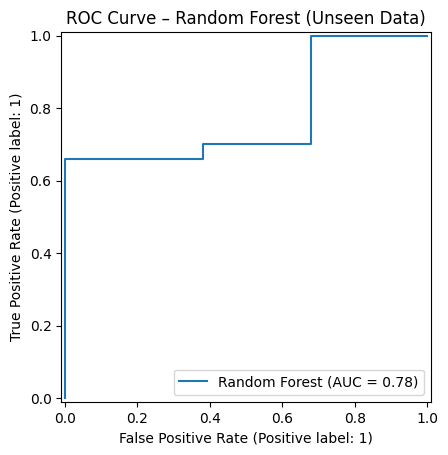

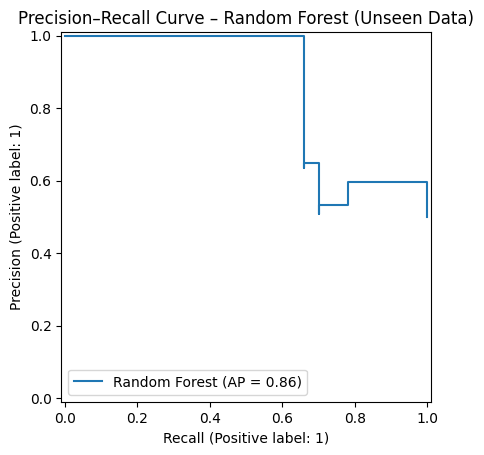


❌ False Negatives: 17
❌ False Positives: 19

✅ Random Forest unseen test metrics saved


In [6]:
import json
import joblib
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, UTC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    RocCurveDisplay,
    PrecisionRecallDisplay
)

# ======================================================
# PATHS
# ======================================================
ARTIFACT_DIR = r"C:\medveraxbecustom\model_artifacts"

MODEL_PATH = f"{ARTIFACT_DIR}\\random_forest_model.pkl"
VECTORIZER_PATH = f"{ARTIFACT_DIR}\\tfidf_vectorizer.pkl"

# ======================================================
# LOAD MODEL & VECTORIZER
# ======================================================
model = joblib.load(MODEL_PATH)
vectorizer = joblib.load(VECTORIZER_PATH)

print("✅ Random Forest model and vectorizer loaded")

# ======================================================
# CREATE UNSEEN DATA (INSIDE CODE)
# ======================================================
random.seed(42)

diseases = [
    "diabetes", "cancer", "hypertension",
    "asthma", "arthritis", "covid"
]

unseen_reliable = [
    "Clinical guidelines recommend medical supervision for {d}",
    "Doctors advise evidence based treatment for {d}",
    "Treatment of {d} depends on diagnosis and severity",
    "Medical professionals manage {d} using proven therapies",
]

unseen_misinfo = [
    "{d} can be cured permanently without doctors",
    "Natural remedies guarantee cure for {d}",
    "Doctors hide the real cure for {d}",
    "{d} does not need any medical treatment",
]

texts, labels = [], []

# 50 reliable samples
for _ in range(50):
    texts.append(random.choice(unseen_reliable).format(d=random.choice(diseases)))
    labels.append(0)

# 50 misinformation samples
for _ in range(50):
    texts.append(random.choice(unseen_misinfo).format(d=random.choice(diseases)))
    labels.append(1)

df_unseen = pd.DataFrame({"text": texts, "label": labels})

print("✅ Unseen dataset created:", df_unseen.shape)

# ======================================================
# VECTORIZE
# ======================================================
X_unseen = vectorizer.transform(df_unseen["text"])
y_true = df_unseen["label"]

# ======================================================
# PREDICTION
# ======================================================
y_pred = model.predict(X_unseen)
y_prob = model.predict_proba(X_unseen)[:, 1]

# ======================================================
# METRICS
# ======================================================
metrics = {
    "Accuracy": accuracy_score(y_true, y_pred),
    "Precision": precision_score(y_true, y_pred),
    "Recall": recall_score(y_true, y_pred),
    "F1 Score": f1_score(y_true, y_pred),
    "ROC-AUC": roc_auc_score(y_true, y_prob),
    "Brier Score": np.mean((y_prob - y_true) ** 2)
}

print("\n📊 UNSEEN DATA METRICS (Random Forest)")
for k, v in metrics.items():
    print(f"{k}: {v:.4f}")

# ======================================================
# CONFUSION MATRIX
# ======================================================
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Random Forest (Unseen Data)")
plt.show()

tn, fp, fn, tp = cm.ravel()
print(f"TN={tn}, FP={fp}, FN={fn}, TP={tp}")

# ======================================================
# CLASSIFICATION REPORT
# ======================================================
print("\n📄 Classification Report (Random Forest)")
print(classification_report(y_true, y_pred))

# ======================================================
# ROC CURVE
# ======================================================
RocCurveDisplay.from_predictions(
    y_true, y_prob, name="Random Forest"
)
plt.title("ROC Curve – Random Forest (Unseen Data)")
plt.show()

# ======================================================
# PRECISION–RECALL CURVE
# ======================================================
PrecisionRecallDisplay.from_predictions(
    y_true, y_prob, name="Random Forest"
)
plt.title("Precision–Recall Curve – Random Forest (Unseen Data)")
plt.show()

# ======================================================
# ERROR ANALYSIS
# ======================================================
errors = pd.DataFrame({
    "text": df_unseen["text"],
    "true_label": y_true,
    "predicted_label": y_pred,
    "probability": y_prob
})

false_negatives = errors[(errors.true_label == 1) & (errors.predicted_label == 0)]
false_positives = errors[(errors.true_label == 0) & (errors.predicted_label == 1)]

print("\n❌ False Negatives:", len(false_negatives))
print("❌ False Positives:", len(false_positives))

# ======================================================
# SAVE METRICS
# ======================================================
output = {
    "model": "Random Forest",
    "evaluation_type": "synthetic_unseen_data",
    "sample_size": len(df_unseen),
    "metrics": {k: round(v, 4) for k, v in metrics.items()},
    "confusion_matrix": {
        "TN": int(tn),
        "FP": int(fp),
        "FN": int(fn),
        "TP": int(tp)
    },
    "evaluated_on": datetime.now(UTC).isoformat()
}

with open(f"{ARTIFACT_DIR}\\rf_unseen_test_metrics.json", "w") as f:
    json.dump(output, f, indent=4)

print("\n✅ Random Forest unseen test metrics saved")


✅ All models and vectorizer loaded
✅ Unseen dataset created: (100, 2)

📊 MODEL COMPARISON TABLE


,Accuracy,Precision,Recall,F1 Score,ROC-AUC,Brier Score,False Positives,False Negatives
Logistic Regression,0.77,0.7547,0.80,0.7767,0.8120,0.1791,13.0,10.0
Naive Bayes,0.87,0.8246,0.94,0.8785,0.9520,0.0942,10.0,3.0
Linear SVM (Calibrated),0.72,0.7292,0.70,0.7143,0.8124,0.2729,13.0,15.0
Random Forest,0.64,0.6346,0.66,0.6471,0.7808,0.2038,19.0,17.0


<Figure size 1000x600 with 0 Axes>

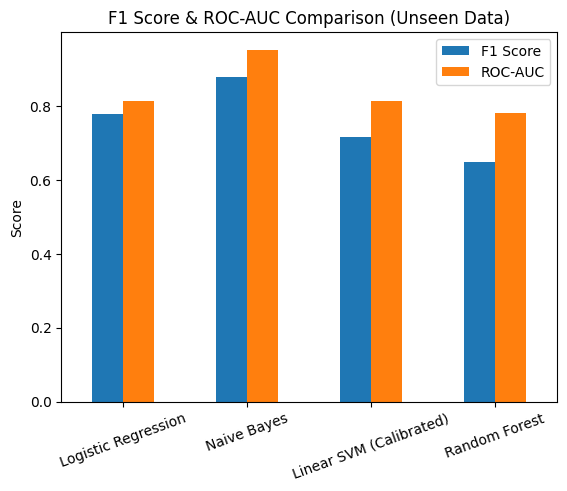

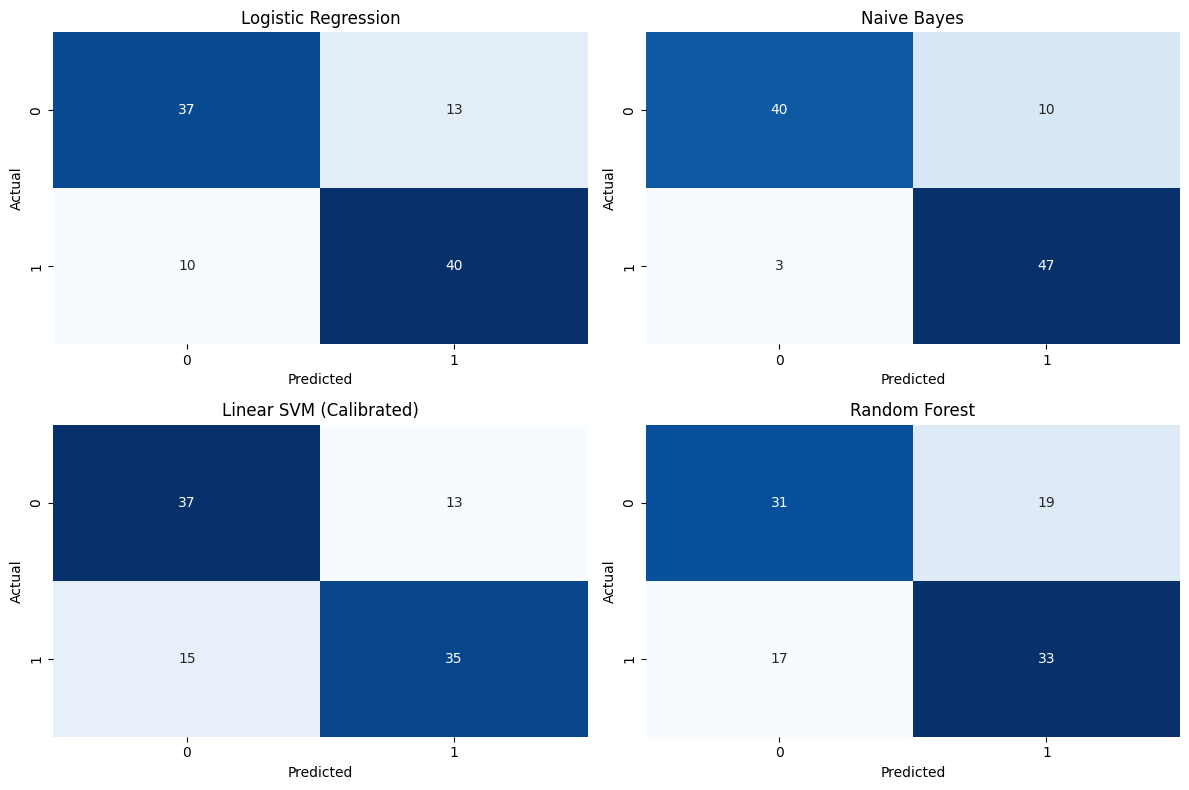

<Figure size 800x600 with 0 Axes>

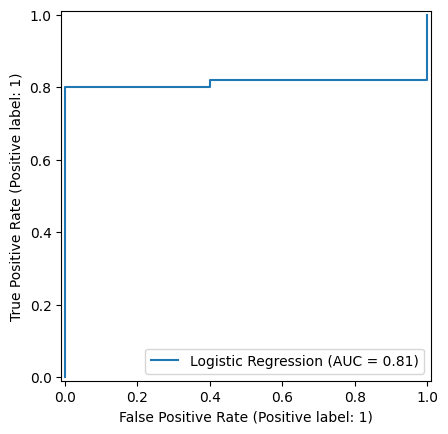

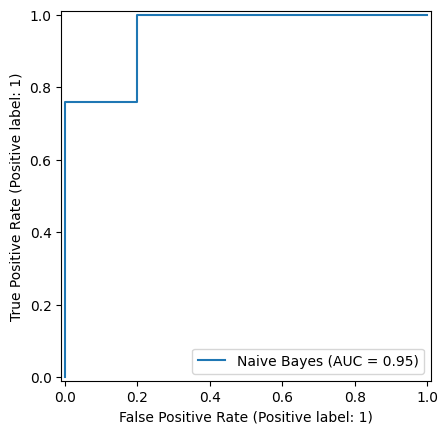

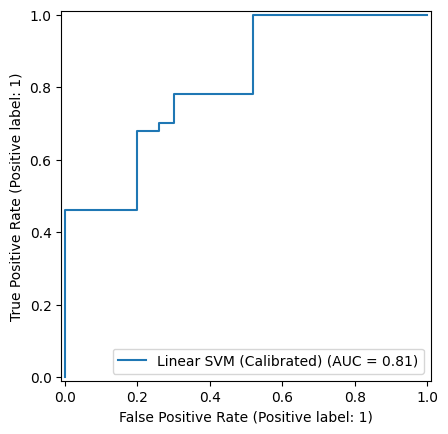

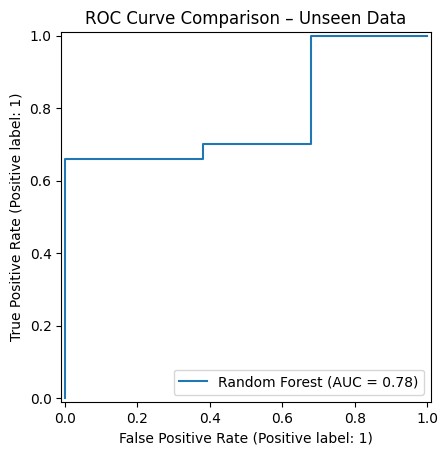

<Figure size 800x600 with 0 Axes>

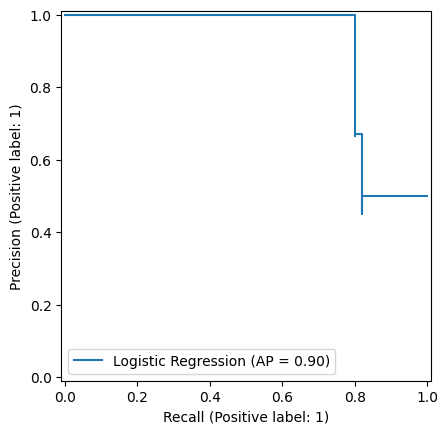

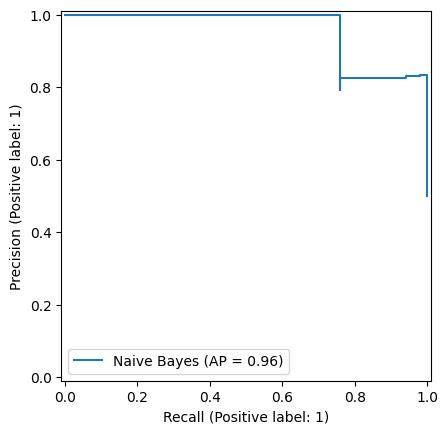

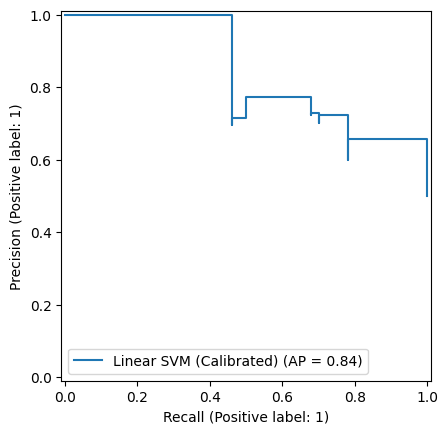

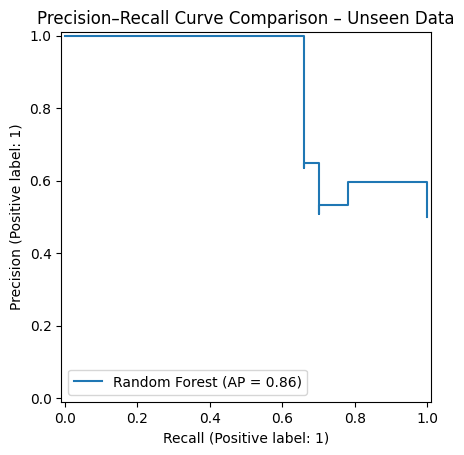


✅ Combined unseen model comparison saved successfully
📁 File saved at: C:\medveraxbecustom\model_artifacts\combined_unseen_model_comparison.json


In [7]:
import json
import joblib
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, UTC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix,
    classification_report, RocCurveDisplay,
    PrecisionRecallDisplay
)

# ======================================================
# PATHS
# ======================================================
ARTIFACT_DIR = r"C:\medveraxbecustom\model_artifacts"

MODEL_PATHS = {
    "Logistic Regression": f"{ARTIFACT_DIR}\\logistic_regression_model.pkl",
    "Naive Bayes": f"{ARTIFACT_DIR}\\naive_bayes_model.pkl",
    "Linear SVM (Calibrated)": f"{ARTIFACT_DIR}\\linear_svm_calibrated_model.pkl",
    "Random Forest": f"{ARTIFACT_DIR}\\random_forest_model.pkl",
}

VECTORIZER_PATH = f"{ARTIFACT_DIR}\\tfidf_vectorizer.pkl"

# ======================================================
# LOAD MODELS & VECTORIZER
# ======================================================
models = {name: joblib.load(path) for name, path in MODEL_PATHS.items()}
vectorizer = joblib.load(VECTORIZER_PATH)

print("✅ All models and vectorizer loaded")

# ======================================================
# CREATE UNSEEN DATA (INSIDE CODE)
# ======================================================
random.seed(42)

diseases = [
    "diabetes", "cancer", "hypertension",
    "asthma", "arthritis", "covid"
]

reliable_templates = [
    "Clinical guidelines recommend medical supervision for {d}",
    "Doctors advise evidence based treatment for {d}",
    "Treatment of {d} depends on diagnosis and severity",
    "Medical professionals manage {d} using proven therapies",
]

misinfo_templates = [
    "{d} can be cured permanently without doctors help and assistance",
    "Natural remedies guarantee cure for {d}",
    "Doctors hide the real cure for {d}",
    "{d} does not need any medical treatment",
]

texts, labels = [], []

for _ in range(50):
    texts.append(random.choice(reliable_templates).format(d=random.choice(diseases)))
    labels.append(0)

for _ in range(50):
    texts.append(random.choice(misinfo_templates).format(d=random.choice(diseases)))
    labels.append(1)

df_unseen = pd.DataFrame({"text": texts, "label": labels})

print("✅ Unseen dataset created:", df_unseen.shape)

# ======================================================
# VECTORIZE UNSEEN DATA
# ======================================================
X_unseen = vectorizer.transform(df_unseen["text"])
y_true = df_unseen["label"]

# ======================================================
# EVALUATION
# ======================================================
results = {}
all_probs = {}
all_preds = {}

for name, model in models.items():
    preds = model.predict(X_unseen)
    probs = model.predict_proba(X_unseen)[:, 1]

    all_preds[name] = preds
    all_probs[name] = probs

    tn, fp, fn, tp = confusion_matrix(y_true, preds).ravel()

    results[name] = {
        "Accuracy": accuracy_score(y_true, preds),
        "Precision": precision_score(y_true, preds),
        "Recall": recall_score(y_true, preds),
        "F1 Score": f1_score(y_true, preds),
        "ROC-AUC": roc_auc_score(y_true, probs),
        "Brier Score": np.mean((probs - y_true) ** 2),
        "False Positives": fp,
        "False Negatives": fn
    }

# ======================================================
# METRICS TABLE
# ======================================================
metrics_df = pd.DataFrame(results).T
print("\n📊 MODEL COMPARISON TABLE")
display(metrics_df.round(4) if "display" in globals() else metrics_df.round(4))

# ======================================================
# BAR PLOT – CORE METRICS
# ======================================================
plt.figure(figsize=(10,6))
metrics_df[["F1 Score", "ROC-AUC"]].plot(kind="bar")
plt.title("F1 Score & ROC-AUC Comparison (Unseen Data)")
plt.ylabel("Score")
plt.xticks(rotation=20)
plt.show()

# ======================================================
# CONFUSION MATRICES
# ======================================================
plt.figure(figsize=(12,8))

for i, (name, preds) in enumerate(all_preds.items(), 1):
    plt.subplot(2,2,i)
    cm = confusion_matrix(y_true, preds)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(name)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# ======================================================
# ROC CURVES
# ======================================================
plt.figure(figsize=(8,6))
for name, probs in all_probs.items():
    RocCurveDisplay.from_predictions(
        y_true, probs, name=name
    )
plt.title("ROC Curve Comparison – Unseen Data")
plt.show()

# ======================================================
# PRECISION–RECALL CURVES
# ======================================================
plt.figure(figsize=(8,6))
for name, probs in all_probs.items():
    PrecisionRecallDisplay.from_predictions(
        y_true, probs, name=name
    )
plt.title("Precision–Recall Curve Comparison – Unseen Data")
plt.show()

# ======================================================
# SAVE RESULTS
# ======================================================
# ======================================================
# SAVE RESULTS (FIXED JSON SERIALIZATION)
# ======================================================
import os  # ✅ REQUIRED

output = {
    "evaluation_type": "combined_unseen_data",
    "sample_size": int(len(df_unseen)),
    "metrics": {
        model_name: {
            metric_name: float(metric_value)
            for metric_name, metric_value in model_metrics.items()
        }
        for model_name, model_metrics in results.items()
    },
    "evaluated_on": datetime.now(UTC).isoformat()
}

output_path = os.path.join(
    ARTIFACT_DIR, "combined_unseen_model_comparison.json"
)

with open(output_path, "w") as f:
    json.dump(output, f, indent=4)

print("\n✅ Combined unseen model comparison saved successfully")
print(f"📁 File saved at: {output_path}")


